In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.io.arff import loadarff
%matplotlib inline
sns.set_theme()


data_dir = './data/'
seed = 42

 # Load September 2013 European Cardholders

In [25]:
arff = loadarff(f'{data_dir}September 2013 by european cardholders.arff')
cardholders = pd.DataFrame(arff[0])
print(f'Cardholders Transactions {cardholders.shape}')
# convert Class to int
cardholders.Class = cardholders.Class.str.decode('utf-8').astype(int)
cardholders = cardholders.rename(columns={'Class': 'fraud', 'Amount': 'amount'})
cardholders.head()

Cardholders Transactions (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Fraud distribution

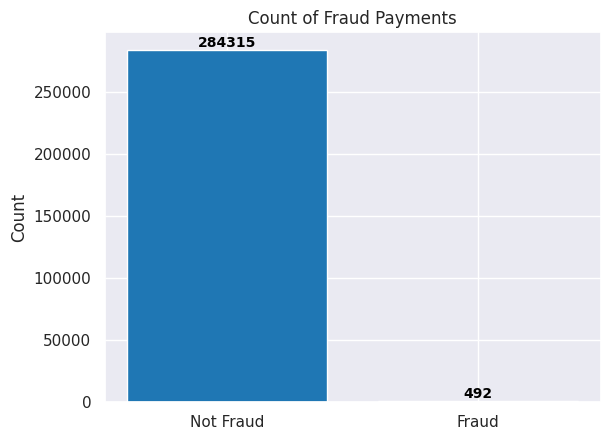

In [23]:

# Fraud 
fraud = cardholders.fraud.value_counts()
fig, ax = plt.subplots()
bars = ax.bar(['Not Fraud', 'Fraud'],fraud.values, color=['#1f77b4', '#d62728'])

# Add labels to the top of each bar
ax.bar_label(bars, labels=fraud.values, label_type='edge', color='black', fontsize=10, weight='bold')

# Customize the plot
ax.set_ylabel('Count')
ax.set_title('Count of Fraud Payments')
plt.show()

Text(0.5, 1.0, 'Amount Distribution - Max 25691.16')

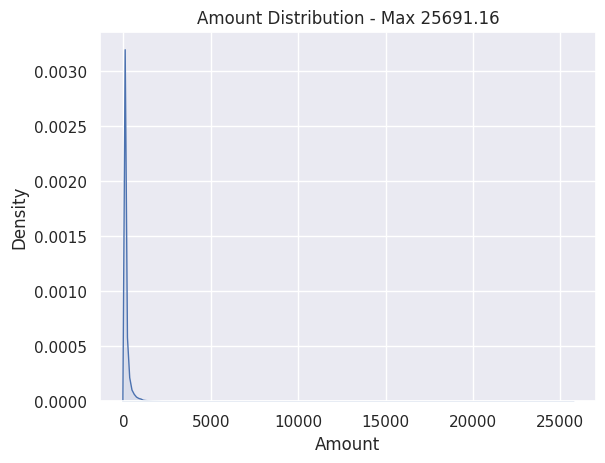

In [26]:
sns.kdeplot(data=cardholders, x='amount', fill=True, alpha=0.1, linewidth=1)
plt.xlabel('Amount')
plt.ylabel('Density')
max_amount = max(cardholders.amount)
plt.title(f'Amount Distribution - Max {max_amount}')

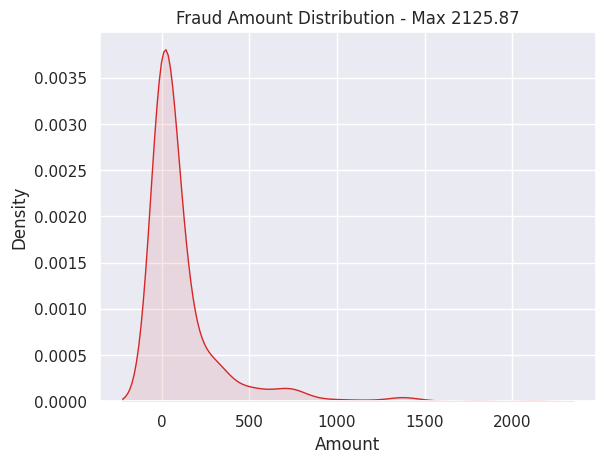

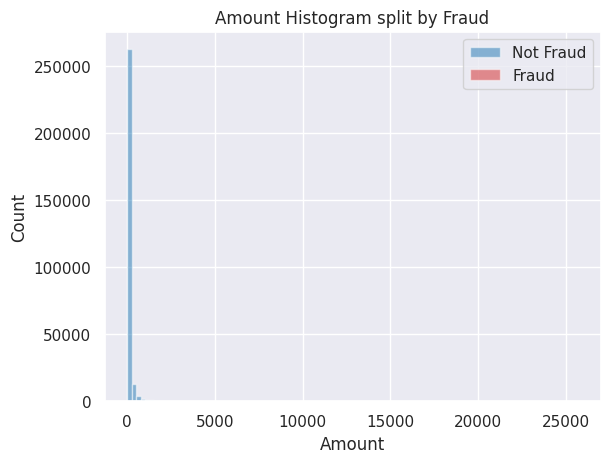

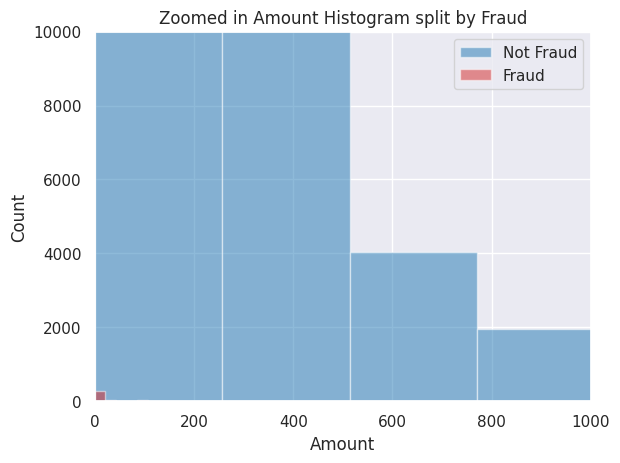

In [29]:
fraud = cardholders.loc[cardholders.fraud == 1]
not_fraud = cardholders.loc[cardholders.fraud == 0]

sns.kdeplot(data=fraud, x='amount', fill=True, color='#d62728', alpha=0.1, linewidth=1)
plt.xlabel('Amount')
plt.ylabel('Density')
max_amount = max(fraud.amount)
plt.title(f'Fraud Amount Distribution - Max {max_amount}')
plt.show()

plt.hist(not_fraud.amount, alpha=0.5,label='Not Fraud', bins=100, color='#1f77b4')
plt.hist(fraud.amount, alpha=0.5,label='Fraud', bins=100, color='#d62728')
plt.title('Amount Histogram split by Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.hist(not_fraud.amount, alpha=0.5,label='Not Fraud', bins=100, color='#1f77b4')
plt.hist(fraud.amount, alpha=0.5,label='Fraud', bins=100, color='#d62728')
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.title('Zoomed in Amount Histogram split by Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

# Split Data

In [32]:
def label_encode(data, cat_cols):
    label_encoders = {}
    for col in cat_cols:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])
    return label_encoders

def label_decode(data, encoders):
    for col, encoder in encoders.items():
        data[col] = encoder.inverse_transform(data[col])

# Clean up data
data = cardholders
print(data.nunique())

# Split data
X = data.drop(['fraud'], axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=seed, shuffle=True, stratify=y)
data.dtypes

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
amount     32767
fraud          2
dtype: int64


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
amount    float64
fraud       int64
dtype: object

# Create Random Forest

In [33]:
rand_forest = RandomForestClassifier(random_state=seed)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

# Evaluate Results

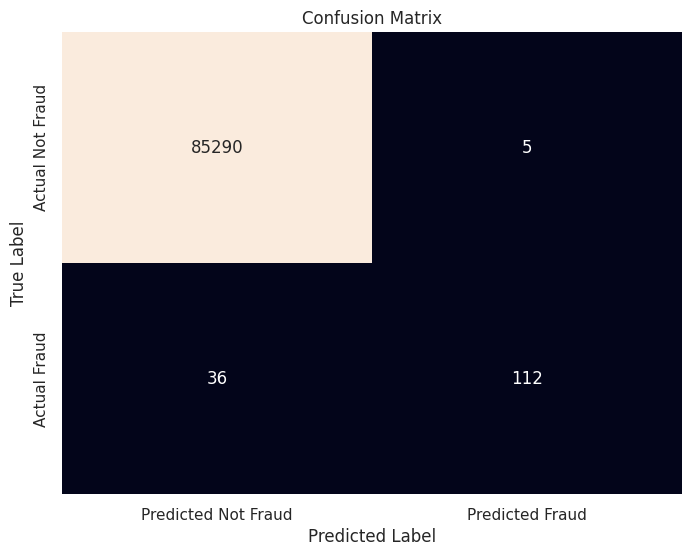

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [34]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Not Fraud', 'Actual Fraud'], columns=['Predicted Not Fraud', 'Predicted Fraud'])

# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test,y_pred))
